   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
Pa

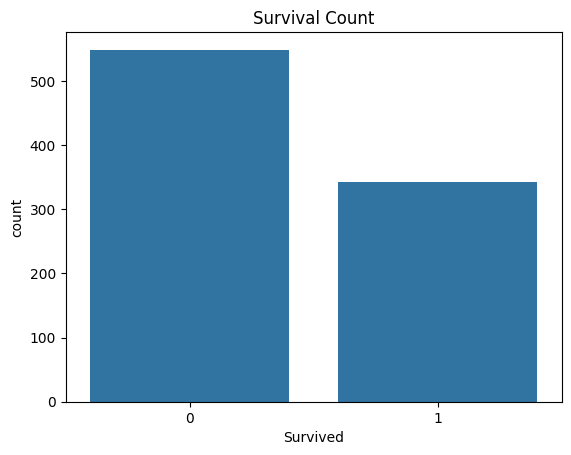

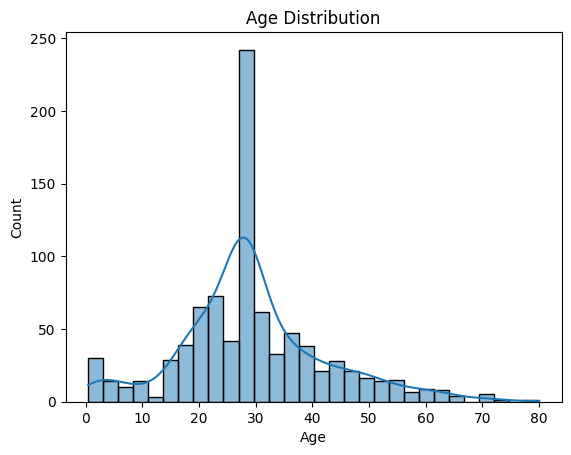

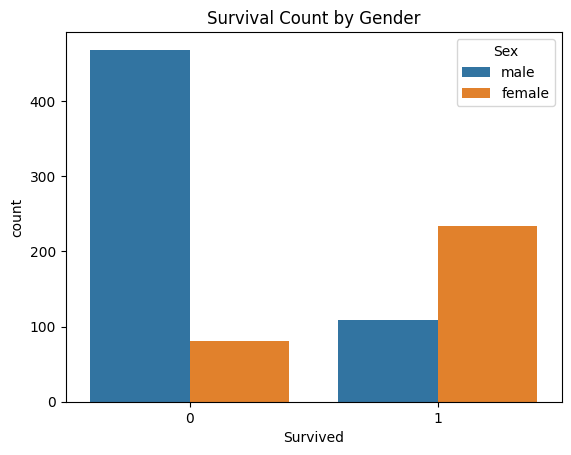

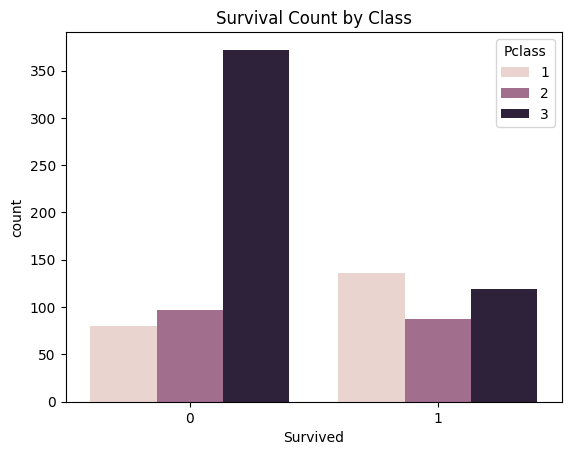

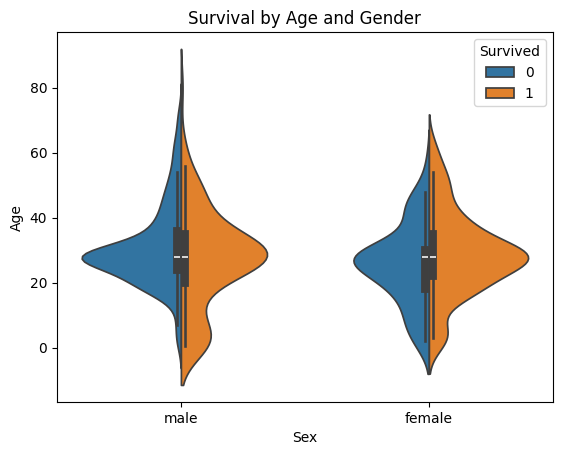

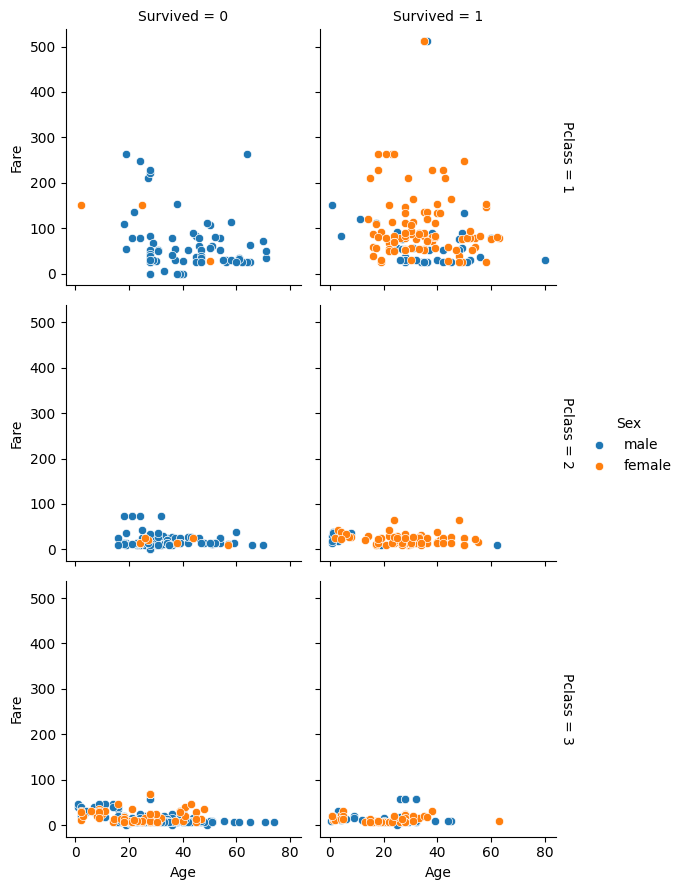

In [5]:
import pandas as pd
# Load the dataset
file_path =('/content/Titanic-Dataset.csv.xls')
titanic_df = pd.read_csv(file_path)
# Display the first few rows of the dataset
print(titanic_df.head())

# Checking for missing values
missing_values = titanic_df.isnull().sum()
print(missing_values)
# Fill missing values for 'Age' with the median age
titanic_df['Age'].fillna(titanic_df['Age'].median(), inplace=True)
# Fill missing values for 'Embarked' with the most common port
titanic_df['Embarked'].fillna(titanic_df['Embarked'].mode()[0], inplace=True)
# Drop 'Cabin' column due to too many missing values
titanic_df.drop(columns=['Cabin'], inplace=True)
# Verify no more missing values
print(titanic_df.isnull().sum())


import seaborn as sns
import matplotlib.pyplot as plt
# Univariate Analysis: Survived
sns.countplot(x='Survived', data=titanic_df)
plt.title('Survival Count')
plt.show()
# Univariate Analysis: Age
sns.histplot(titanic_df['Age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.show()


# Bivariate Analysis: Survival by Gender
sns.countplot(x='Survived', hue='Sex', data=titanic_df)
plt.title('Survival Count by Gender')
plt.show()
# Bivariate Analysis: Survival by Class
sns.countplot(x='Survived', hue='Pclass', data=titanic_df)
plt.title('Survival Count by Class')
plt.show()


# Multivariate Analysis: Survival by Age and Gender
sns.violinplot(x='Sex', y='Age', hue='Survived', data=titanic_df, split=True)
plt.title('Survival by Age and Gender')
plt.show()
# Multivariate Analysis: Survival by Age, Class, and Gender
g = sns.FacetGrid(titanic_df, col='Survived', row='Pclass', hue='Sex', margin_titles=True)
g.map(sns.scatterplot, 'Age', 'Fare')
g.add_legend()
plt.show()